# Model dravce a kořisti

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp


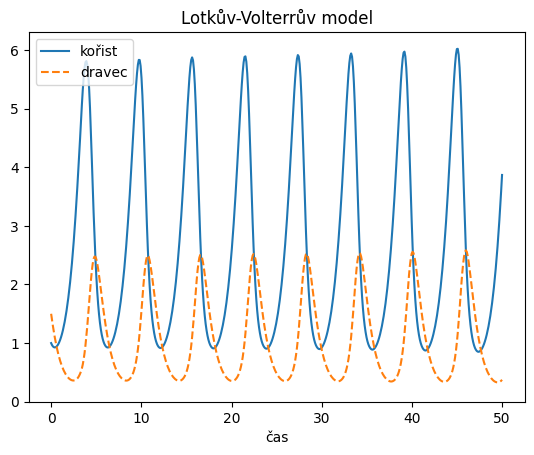

In [2]:
def korist(x,y,a,b):
    return a*x - b*x*y #- 0.1*x**2

def dravec(x,y,c,d):
    return -c*y+d*x*y

def model(t,X):
    x,y = X
    a=1.1
    b=1
    c=1.2
    d=0.45
    return [korist(x,y,a,b),dravec(x,y,c,d)]

# def model(t,X):
#     x,y = X
#     return [x*(1-x-1.4*y),y*(1-1.5*x-y)]

t = np.linspace(0, 50, 500)
sol = solve_ivp(
    model, 
    [t[0], t[-1]], # interval pro reseni
    [1, 1.5], # pocatecn podminka
    t_eval=t
)

df = pd.DataFrame(data=sol.y.T, index=t, columns=["kořist","dravec"])
df.index.name = "čas"
ax = df.plot(style=["-","--"])
ax.set(title='Lotkův-Volterrův model', ylim= (0,None));
# plt.savefig("Lotka-Volterra_prubeh.pdf")

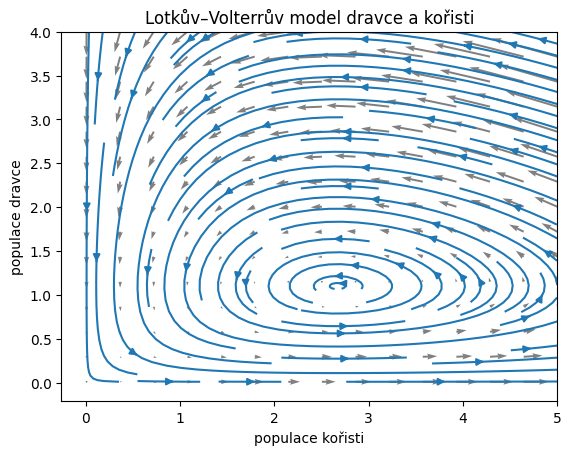

In [3]:
xmax = 5
ymax = 4
x, y = np.meshgrid(np.linspace(0.01, xmax, 15), 
                   np.linspace(0.01, ymax, 15))

# Komponenty vektoroveho pole
u,v = model(0,[x,y])
fig,ax = plt.subplots()
ax.quiver(x,y,u,v,color='gray',units='xy', angles='xy') # vykresleni s jednotkovou delkou
ax.streamplot(x, y, u, v, density=1)
# ax.plot(df['kořist'],df['dravec'])

ax.set(
xlabel="populace kořisti",
ylabel="populace dravce",
title="Lotkův–Volterrův model dravce a kořisti");
# plt.savefig("Lotka-Volterra_portret.pdf")

Následující model je kopií předchozího. Navíc je vše spojeno v jednom poli. Předělejte jej na model konkurence dvou populací, mezi kterými je slabá konkurence. Pokuste se opravit i komentář. 

Predaci je možno modelovat soustavou soustavou rovnic
$$\begin{aligned}
\frac{\mathrm dx}{\mathrm dt} &= ax - bxy,\\
\frac{\mathrm dy}{\mathrm dt} &= -cy + dxy,
\end{aligned}$$
kde $x$ je velikost populace kořisti, $y$ je velikost populace predátora, $t$ je čas a ostatní proměnné jsou parametry modelu.

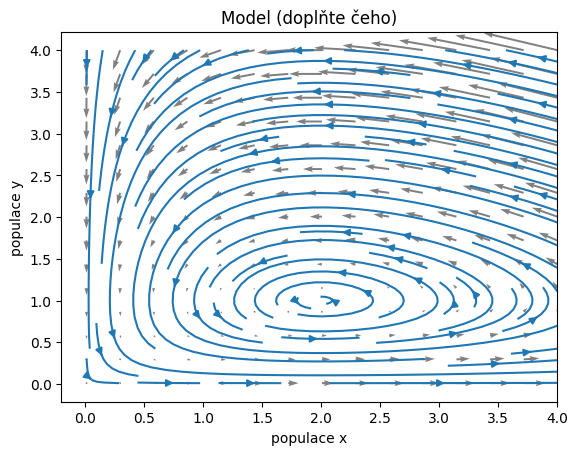

In [4]:
xmax = 4
ymax = 4
def model(t,X,a=1,b=1,c=1,d=0.5):
    x,y = X
    return [a*x - b*x*y ,-c*y+d*x*y]

x, y = np.meshgrid(np.linspace(0.01, xmax, 15), 
                   np.linspace(0.01, ymax, 15))

# Komponenty vektoroveho pole
u,v = model(0,[x,y])
fig,ax = plt.subplots()
ax.quiver(x,y,u,v,color='gray',units='xy', angles='xy') # vykresleni s jednotkovou delkou
ax.streamplot(x, y, u, v, density=1)

ax.set(
xlabel="populace x",
ylabel="populace y",
title="Model (doplňte čeho)");